[1] 1
       up    left   down   right
s0 -1.200 -1.1900 -1.393 -1.2000
s1 -2.562 -2.8000 -2.700 -2.5914
s2 -0.600 -0.6042 -0.600 -0.5000
s3  0.000  0.0000  0.000  0.0000
[1] 100
[1] "down"  "right" "up"    "left" 
          up      left     down    right
s0  9.079147  9.229482 12.75052  9.07414
s1 17.461102 38.287710 37.79978 44.93932
s2 71.393134 43.312422 62.58377 63.67484
s3  0.000000  0.000000  0.00000  0.00000
       [,1]
  [1,]  185
  [2,]  462
  [3,]  517
  [4,]  359
  [5,]  253
  [6,]  841
  [7,]  156
  [8,]  270
  [9,]   30
 [10,]  274
 [11,]   90
 [12,]  120
 [13,]  324
 [14,]  127
 [15,]  291
 [16,]   75
 [17,]  254
 [18,]   58
 [19,]  204
 [20,]  198
 [21,]  498
 [22,]  352
 [23,]   77
 [24,]  102
 [25,]  199
 [26,]  271
 [27,]  727
 [28,]  184
 [29,]  558
 [30,] 1111
 [31,]   48
 [32,]   40
 [33,]  235
 [34,]  502
 [35,]  448
 [36,]   41
 [37,]  117
 [38,]   78
 [39,]  788
 [40,]  257
 [41,]  482
 [42,]   63
 [43,]  308
 [44,]   29
 [45,]  177
 [46,]  162
 [47,]   38
 [48

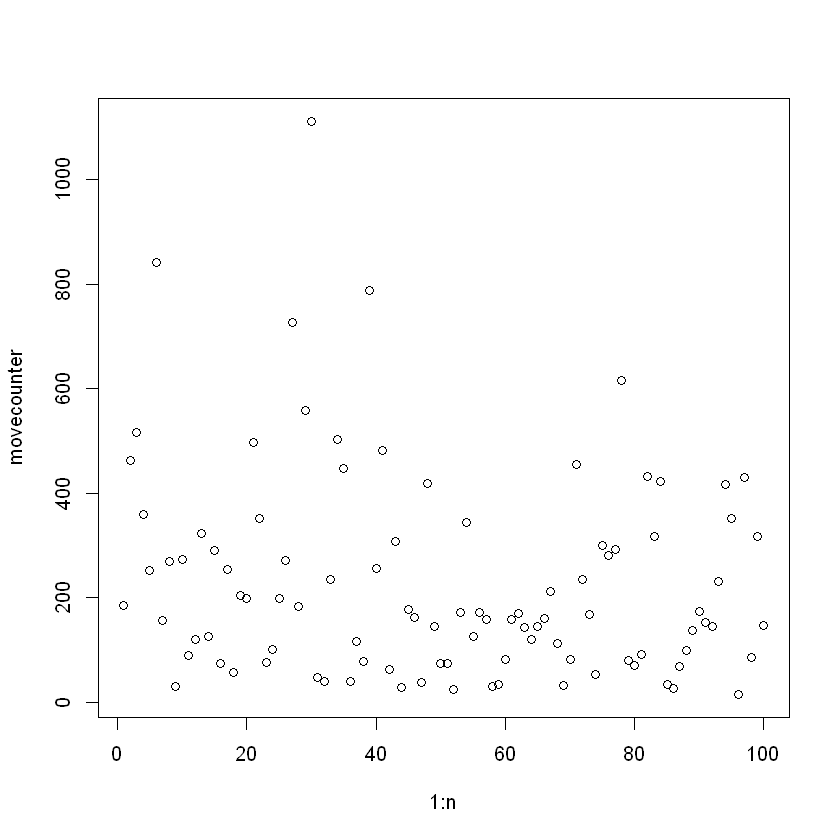

In [7]:
# all in one script 
# useful stuff for debugging: 
# browser() # breakpoint cf. Keyboard in matlab

# define possible actions and states 
# combine elements into a vector using  '<- c'
actions <- c("up", "left", "down", "right") 
states <- c("s0", "s1", "s2", "s3") 
n <- 100   # specfy how many times you want to run the q-learning function
s_0 <- "s0" # start at initial state 
s_terminal <- "s3" # goal state
epsilon <- 0.1 # parameter for ε-greedy action selection
learning_rate <- 0.1 # LR

movecounter = matrix(0, nrow=n, ncol=1)

  # ============================================================
  # Initialize state-action function Q to zero
  # ============================================================
  # use 'matrix' to create state-action value table. 
  Q <- matrix(0, nrow=length(states), ncol=length(actions), dimnames=list(states, actions))
  
  # ============================================================
  # Perform n iterations of Q-learning
  # ============================================================
for (i in 1:n) {
	if (i %% 100 == 0) {
	    print(i) # tell me what iteration I am at every 100 iterations
	}
	else {
	#do nothing
	 }
	 
	  
# ============================================================
# Go to start
# ============================================================
	  state <- s_0 # set cursor to initial state 
    
    moves = 0;
	  		
	  	# while loop until we arrive in 'terminal state'
			while (state != s_terminal) {  
			  # ============================================================	
			  # epsilon-greedy action selection 
			  # ============================================================
			  # runif = R_andom UNIF_orm (nothing to do with 'if' statement): 
			  # generate n (here 1) uniform random numbers in interval between min,max. 
			  # If min or max are not specified they assume the default values of 0 and 1 respectively (as is the case here)
				if (runif(1) <= epsilon) {
					action <- sample(actions, 1)  # pick random action ('sample' takes a sample of the specified size (here 1) from the elements of 'actions') 
				} else {
					action <- which.max(Q[state, ]) # pick first best action (which.max determines the index of the (first) maximum of a numeric (or logical) vector.)
				}
				# ============================================================
			  # get next state and reward from environment based on action
				# ============================================================
				# create a function that mimics the 'ENVIRONMENT'
				# Calculate next state (according to sample grid with wall) 
				# Remain in a state if action tries to leave grid 
				next_state <- state
				if (state == "s0" && action == "down") 
				next_state <- "s1" 
				if (state == "s1" && action == "up") 
				next_state <- "s0" 
				if (state == "s1" && action == "right") 
				next_state <- "s2" 
				if (state == "s2" && action == "left") 
				next_state <- "s1" 
				if (state == "s2" && action == "up") 
				next_state <- "s3" 
				if (state == "s3" && action == "down") 
				next_state <- "s2" 
				
				# Calculate reward
				if (next_state == "s3") { reward <- 100 
				} else { reward <- -1 
				} 
				
				# not sure if I understnad the difference between = and <- 
				# Is this correct/best practice? Seems to work...
				response <- (list(state=next_state, reward=reward)) 
				# ============================================================
    		# update rule for Q-learning
    		# ============================================================
				# not necessary but interesting to look at
    		if ((i == 1) & (next_state == "s3"))	{             #	if (i %% 300 == 0) {
    		    print(i)
				    print(Q) # what does q-look like after first successful iteration (i==1)
				   # browser()
  			} else {
  			}

				
				# State action fucntion 'Q'
				# max(Q[response$state, ]) = estimated
				Q[state, action] <- Q[state, action] + learning_rate * (response$reward + max(Q[response$state, ]) - Q[state, action])
				state <- response$state # move to next state 
                
                moves = moves + 1
			}  # end of while loop
        
        movecounter[i] = moves
        
} # end of i loop 


print(actions[max.col(Q)])
print(Q)
print(movecounter)
plot(1:n,movecounter)


